# Do numpy arrays differ from Tensors?

https://medium.com/dailytech/numpy-arrays-vs-tensors-c58ea54f0e59

In [5]:
#import libraries
import os
import tensorflow as tf
import numpy as np
import time

print("TensorFlow version:", tf.__version__)
print(tf.config.list_physical_devices('CPU'))
print(tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.13.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
# function performing operation and returning us the time.
def time_matmul(type,x):
  start = time.time()
  if type=='numpy':
    for loop in range(10):
      np.matmul(x,x)
      if (time.time()-start)*1000>2000:
        return 2000
  else:
    for loop in range(10):
      tf.matmul(x,x)
      if (time.time()-start)*1000>2000:
        return 2000
  diff = time.time() - start
  #return "{:0.2f}ms".format(1000*diff)
  return diff*1000

# Below three will store the shape, numpy time, cpu tensor time and gpu tensor time
# for evaluation
# time in ms
# MAKE SURE GPU IS SELECTED AS HARDWARE ACCELERATOR

shape_dim = []
num_time = []
cpu_tf_time = []
gpu_tf_time = []

for shape in range(500,5001,100):
  # Let's start with shape 500,500 to 10000,10000 with an increase of 100
  shape_dim.append(shape)

  # Numpy First
  x_np = np.random.uniform(size=[shape,shape])
  num_time.append(time_matmul('numpy',x_np))

  #Tensor in GPU
  with tf.device("GPU:0"): #Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([shape, shape])
    gpu_tf_time.append(time_matmul('gpu',x))
  
  #Tensor in CPU
  with tf.device("CPU:0"):
    x = tf.random.uniform([shape, shape])
    cpu_tf_time.append(time_matmul('cpu',x))

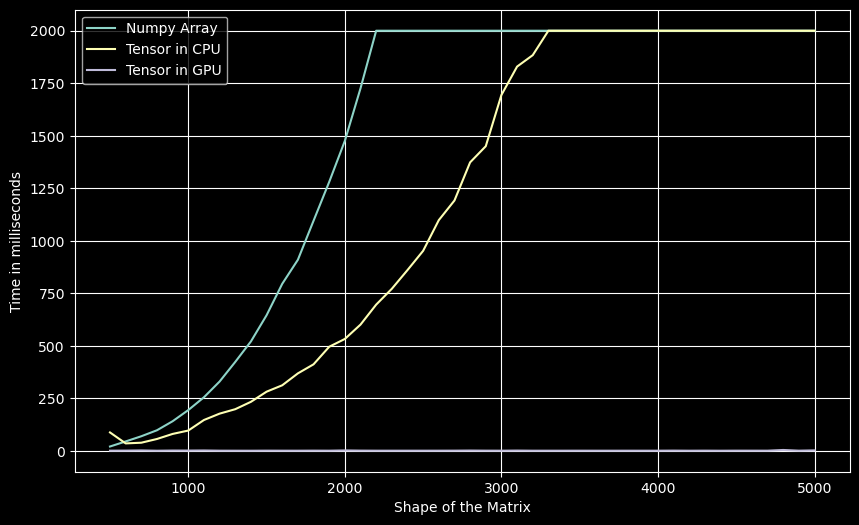

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(shape_dim,num_time,label="Numpy Array")
plt.plot(shape_dim,cpu_tf_time,label="Tensor in CPU")
plt.plot(shape_dim,gpu_tf_time,label="Tensor in GPU")
plt.grid()
plt.xlabel("Shape of the Matrix")
plt.ylabel("Time in milliseconds")
plt.legend()

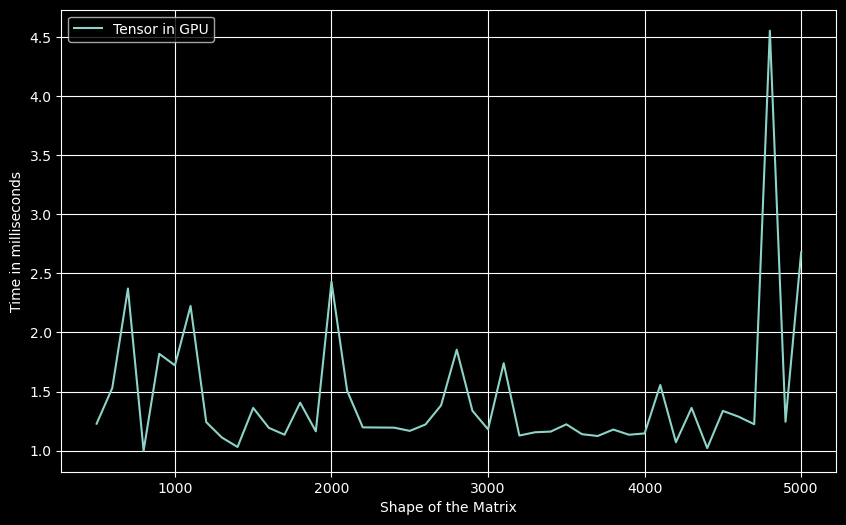

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(shape_dim,gpu_tf_time,label="Tensor in GPU")
plt.grid()
plt.xlabel("Shape of the Matrix")
plt.ylabel("Time in milliseconds")
plt.legend()